# Assignment 3: Neural Net from scratch
*<span style="float:right;">Norine NDOUDI</span>*


In [9]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(10)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8] * h_13 + paras[9])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [10]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

print(len(y))

300


For a better comprehension, I will write the formulas of some variables

$$L(\vec{W};b)= \frac{1}{n}\sum_{\vec{x}\in\vec{X}}(Y-\hat{Y})^2$$ 
With n = the number of data point = 300  


- $\vec{a}^1 = \vec{W}^1 \times \vec{X} + \vec{b}^1$
- $\vec{h}^1 = tanh(\vec{a}^1$)
- $a^2 = \vec{W}^2 \times \vec{h}^1 + b^2$
- $h^2 = \sigma(\vec{a}^2) = \hat{y}$

And $\sigma(x) = \frac{1}{1+e^{-x}}$


Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial h_{21}}\frac{\partial h_{21}}{\partial a_{21}}\frac{\partial a_{21}}{\partial b^2} =   2\times(\hat{y}-y)(1-\hat{y})\hat{y}
$$

Formula of weights of layer 2  
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}} \\
\frac{\partial L}{\partial w^2_{31}}
\end{bmatrix} = \begin{bmatrix}
 \frac{\partial L}{\partial h_{21}}\frac{\partial h_{21}}{\partial a_{21}}\frac{\partial a_{21}}{\partial W^2_{11}}\\
 \frac{\partial L}{\partial h_{21}}\frac{\partial h_{21}}{\partial a_{21}}\frac{\partial a_{21}}{\partial W^2_{21}} \\
 \frac{\partial L}{\partial h_{21}}\frac{\partial h_{21}}{\partial a_{21}}\frac{\partial a_{21}}{\partial W^2_{31}}
\end{bmatrix}  = \begin{bmatrix}
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times h_{11}\\
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times h_{12} \\
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times h_{13}
\end{bmatrix}
$$


Formula of biases of layer 1  
$$
\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}\\
\frac{\partial L}{\partial b^1_3}
\end{bmatrix}  = \begin{bmatrix}
\frac{\partial L}{\partial h_{11}}\frac{\partial h_{11}}{\partial a_{11}}\frac{\partial a_{11}}{\partial b^1_{1}}\\
\frac{\partial L}{\partial h_{12}}\frac{\partial h_{12}}{\partial a_{12}}\frac{\partial a_{12}}{\partial b^1_{2}} \\
\frac{\partial L}{\partial h_{13}}\frac{\partial h_{13}}{\partial a_{13}}\frac{\partial a_{13}}{\partial b^1_{3}}
\end{bmatrix} = \begin{bmatrix}
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{11}(1-(h_{11})^2)\\
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{21}(1-(h_{12})^2) \\
 2\times(\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{31}(1-(h_{13})^2)
\end{bmatrix}
$$

Formula of weights of layer 1
  
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} & \frac{\partial L}{\partial w^1_{13}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  & \frac{\partial L}{\partial w^1_{23}}
\end{bmatrix} = \begin{bmatrix}
2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{11}(1-(h_{11})^2)\times x_{1} && 2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{21}(1-(h_{12})^2) \times x_{1} &&2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{31}(1-(h_{13})^2) \times x_{1} \\
2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{11}(1-(h_{11})^2)\times x_{2} &&2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{21}(1-(h_{12})^2) \times x_{2} &&2\times (\hat{y}-y)(1-\hat{y})\hat{y} \times w^2_{31}(1-(h_{13})^2) \times x_{2}
\end{bmatrix}
$$

In the first part of the code we can notice during the generation of the params variable that : 
- $paras[0] = w^1_{11}$
- $paras[1] = w^1_{21}$
- $paras[2] = b^1_{1}$
- $paras[3] = w^1_{12} = w^1_{13}$
- $paras[4] = w^1_{22} = w^1_{23}$
- $paras[5] = b^1_{2} = b^1_{3}$
- $paras[6] = w^2_{11}$
- $paras[7] = w^2_{12}$
- $paras[8] = w^2_{13}$
- $paras[9] = b^2$

In [11]:
#Creation of the dictionnary to plot the results
history_dict = {
    'loss': [],  
    'val_loss': []  
}

#Initialization number of epochs and the learning rate value
learning_rate = 0.1
num_epochs = 60

#Initialization of the weight and bias to update during backpropagation
W1_11 = paras[0]
W1_21 = paras[1]
b1_1 = paras[2]
W1_12 = paras[3]
W1_13 = paras[3]
W1_22 = paras[4]
W1_23 = paras[4]
b1_2 = paras[5]
b1_3 = paras[5]
W2_11 = paras[6]
W2_12 = paras[7]
W2_13 = paras[8]
b2 = paras[9]

losses = []

# Training the network for 60 epochs
for epoch in range(num_epochs):
    epoch_loss = 0
    for i in range(len(partial_x_train)):
        x = partial_x_train[i]
        y = partial_y_train[i]

        # Forward propagation
        h_11 = math.tanh(W1_11 * x[0] + W1_21 * x[1] + b1_1)
        h_12 = math.tanh(W1_12 * x[0] + W1_22 * x[1] + b1_2 )
        h_13 = math.tanh(W1_13 * x[0] + W1_23 * x[1] + b1_3)
        h_21 = 1 / (1 + math.exp(-(W2_11 * h_11 + W2_12 * h_12 + W2_13 * h_13 + b2)))

        # Loss calculation
        loss = (h_21 - y)**2
        epoch_loss += loss

        # Backpropagation 
        db2 = 2 * (h_21 - y)*(1 - h_21) * h_21
        dW2_11 = db2 * h_11
        dW2_12 = db2 * h_12
        dW2_13 = db2 * h_13
        db1_1 = db2 * paras[6] * (1 - h_11**2)
        db1_2 = db2 * paras[7] * (1 - h_12**2)
        db1_3 = db2 * paras[8] * (1 - h_13**2)
        DW1_11 = db1_1 * x[0]
        DW1_21 = db1_1 * x[1]
        DW1_12 = db1_2 * x[0]
        DW1_22 = db1_2 * x[1]
        DW1_13 = db1_3 * x[0]
        DW1_23 = db1_3 * x[1]

        # Update the weights and bias
        W1_11 -= learning_rate * DW1_11
        W1_21 -= learning_rate * DW1_21
        b1_1 -= learning_rate * db1_1
        W1_12 -= learning_rate * DW1_12
        W1_13 -= learning_rate * DW1_13
        W1_22 -= learning_rate * DW1_22
        W1_23 -= learning_rate * DW1_23
        b1_2 -= learning_rate * db1_2
        b1_3 -= learning_rate * db1_3
        W2_11 -= learning_rate * dW2_11
        W2_12 -= learning_rate * dW2_12
        W2_13 -= learning_rate * dW2_13
        b2 -= learning_rate * db2
        
    #store the training loss for each epoch
    history_dict['loss'].append(epoch_loss / len(partial_x_train))

    #Do the same for the validatation values
    for i in range(len(x_val)):
                
        x = x_val[i]
        y = y_val[i]
        
        # Forward propagation
        h_11 = math.tanh(W1_11 * x[0] + W1_21 * x[1] + b1_1)
        h_12 = math.tanh(W1_12 * x[0] + W1_22 * x[1] + b1_2 )
        h_13 = math.tanh(W1_13 * x[0] + W1_23 * x[1] + b1_3)
        h_21 = 1 / (1 + math.exp(-(W2_11 * h_11 + W2_12 * h_12 + W2_13 * h_13 + b2)))
        
        # Loss calculation
        loss = (h_21 - y)**2
        epoch_loss += loss
        
        # Backpropagation 
        db2 = 2 * (h_21 - partial_y_train[i])*(1 - h_21) * h_21
        dW2_11 = db2 * h_11
        dW2_12 = db2 * h_12
        dW2_13 = db2 * h_13
        db1_1 = db2 * paras[6] * (1 - h_11**2)
        db1_2 = db2 * paras[7] * (1 - h_12**2)
        db1_3 = db2 * paras[8] * (1 - h_13**2)
        DW1_11 = db1_1 * x[0]
        DW1_21 = db1_1 * x[1]
        DW1_12 = db1_2 * x[0]
        DW1_22 = db1_2 * x[1]
        DW1_13 = db1_3 * x[0]
        DW1_23 = db1_3 * x[1]

        # Update the weights and bias
        W1_11 -= learning_rate * DW1_11
        W1_21 -= learning_rate * DW1_21
        b1_1 -= learning_rate * db1_1
        W1_12 -= learning_rate * DW1_12
        W1_13 -= learning_rate * DW1_13
        W1_22 -= learning_rate * DW1_22
        W1_23 -= learning_rate * DW1_23
        b1_2 -= learning_rate * db1_2
        b1_3 -= learning_rate * db1_3
        W2_11 -= learning_rate * dW2_11
        W2_12 -= learning_rate * dW2_12
        W2_13 -= learning_rate * dW2_13
        b2 -= learning_rate * db2

    #store the validation loss for each epoch
    history_dict['val_loss'].append(epoch_loss / len(x_val))
    
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
    

# return the prediction for a given input.
y_pred = []

for x in x_test:
    h_11 = math.tanh(W1_11 * x[0] + W1_21 * x[1] + b1_1)
    h_12 = math.tanh(W1_12 * x[0] + W1_22 * x[1] + b1_2 )
    h_13 = math.tanh(W1_13 * x[0] + W1_23 * x[1] + b1_3)
    h_21 = 1 / (1 + math.exp(-(W2_11 * h_11 + W2_12 * h_12 + W2_13 * h_13 + b2)))
    y_pred.append(h_21)


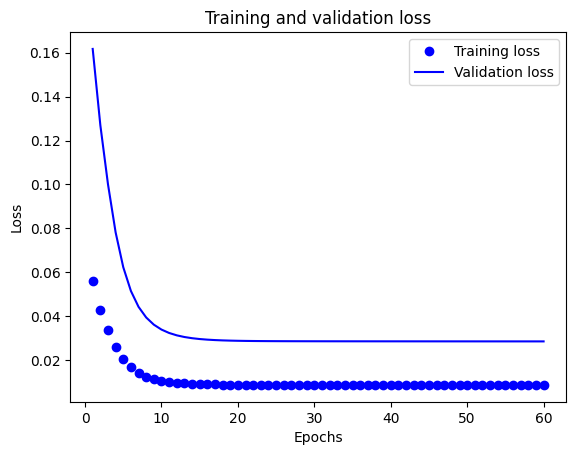

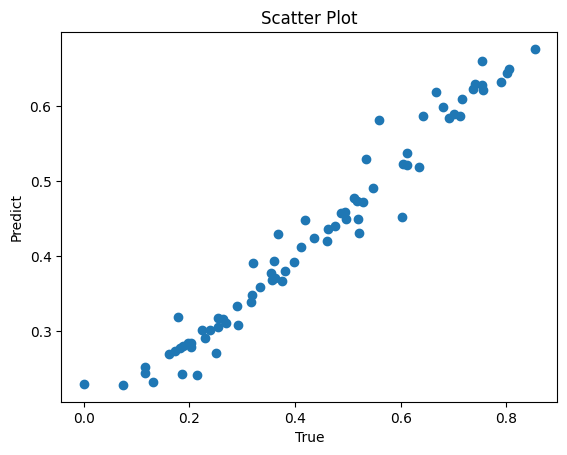

In [12]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)

Compare to the plot obtained with Keras Library, my plot is a little bit different. Training loss and Validation loss are decreasing. The decrease in validation loss is slightly slower. The decrease of these two elements starting from the 12th epoch becomes slower and eventually becomes stable. This could indicate that the model has learned as much as it could from the training data.  
And there is a little gap between the training loss and the validation loss, which may be due to overfitting.